In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv("./datasets/weatherAUS.csv")

In [46]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [45]:
data.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object

In [44]:
for col in data.columns:
    print(data[col].nunique(), col)

49 Location
389 MinTemp
505 MaxTemp
679 Rainfall
356 Evaporation
145 Sunshine
16 WindGustDir
67 WindGustSpeed
16 WindDir9am
16 WindDir3pm
43 WindSpeed9am
44 WindSpeed3pm
101 Humidity9am
101 Humidity3pm
546 Pressure9am
549 Pressure3pm
10 Cloud9am
10 Cloud3pm
440 Temp9am
500 Temp3pm
2 RainToday
2 RainTomorrow


In [43]:
data.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

In [5]:
data.drop("Date", axis=1, inplace=True)

In [6]:
data[["RainToday"]] = data[["RainToday"]].fillna("No")

In [7]:
data = data.drop(data.loc[data['RainTomorrow'].isnull()].index)

In [8]:
encoder = LabelEncoder()
for col in ["RainToday", "RainTomorrow"]:
    data[col] = encoder.fit_transform(data[col])

In [9]:
cat_cols = [col for col in data.columns if (data[col].dtype == "O") and (col not in ['RainTomorrow'])]
cat_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [10]:
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [11]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

In [12]:
data.isna().sum().sum()

0

In [13]:
X = data.drop("RainTomorrow", axis=1)
y = data["RainTomorrow"]

In [14]:
scaler = RobustScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, train_size=0.8)

In [33]:
X_train.shape, X_test.shape

((113754, 110), (28439, 110))

In [34]:
inputs = layers.Input(shape=(110,))
x = layers.Dense(16, activation="relu")(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(2, activation="softmax")(x)

nn_model = keras.Model(inputs=inputs, outputs=outputs)

nn_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 110)]             0         
                                                                 
 dense_3 (Dense)             (None, 16)                1776      
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 2,082
Trainable params: 2,082
Non-trainable params: 0
_________________________________________________________________


In [35]:
nn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [36]:
history = nn_model.fit(X_train, y_train, batch_size=32, epochs=11, validation_split=0.2, verbose=1)

Epoch 1/11
2844/2844 [==============================] - 52s 18ms/step - loss: 0.3684 - accuracy: 0.8388 - val_loss: 0.3548 - val_accuracy: 0.8426
Epoch 2/11
2844/2844 [==============================] - 2s 838us/step - loss: 0.3418 - accuracy: 0.8514 - val_loss: 0.3457 - val_accuracy: 0.8476
Epoch 3/11
2844/2844 [==============================] - 2s 828us/step - loss: 0.3349 - accuracy: 0.8550 - val_loss: 0.3397 - val_accuracy: 0.8487
Epoch 4/11
2844/2844 [==============================] - 2s 798us/step - loss: 0.3297 - accuracy: 0.8572 - val_loss: 0.3368 - val_accuracy: 0.8511
Epoch 5/11
2844/2844 [==============================] - 2s 781us/step - loss: 0.3250 - accuracy: 0.8589 - val_loss: 0.3376 - val_accuracy: 0.8513
Epoch 6/11
2844/2844 [==============================] - 2s 786us/step - loss: 0.3220 - accuracy: 0.8606 - val_loss: 0.3323 - val_accuracy: 0.8551
Epoch 7/11
2844/2844 [==============================] - 2s 770us/step - loss: 0.3195 - accuracy: 0.8616 - val_loss: 0.3317 -

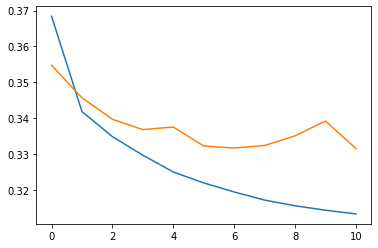

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [38]:
nn_model.evaluate(X_test, y_test)

889/889 [==============================] - 1s 627us/step - loss: 0.3226 - accuracy: 0.8612


[0.32264700531959534, 0.8611765503883362]